Step 4: Modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import sklearn.metrics
from imblearn.over_sampling import SMOTE 
#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

Applying the Machine Learning models:
This is a classification problem, in supervised learning. Here we have used the following classification models:
   
   - Random Forest
   - XGBoost
   - Logistic Regression
  
    
    
    

In [2]:
df = pd.read_pickle(r'C:\Users\User\Car_Accidents_preprocessed.pkl')
df.head()

,CRASH DATE,CRASH TIME,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,COLLISION_ID,DEATH OCCURED,...,Time_14,Time_15,Time_16,Time_17,Time_18,Time_19,Time_20,Time_21,Time_22,Time_23
0,2021-04-14,2021-07-24 05:32:00,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,4407480,False,...,0,0,0,0,0,0,0,0,0,0
1,2021-04-13,2021-07-24 21:35:00,11217.0,40.68358,-73.97617,NaN,NaN,620 ATLANTIC AVENUE,4407147,False,...,0,0,0,0,0,0,0,1,0,0
2,2021-04-15,2021-07-24 16:15:00,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,4407665,False,...,0,0,1,0,0,0,0,0,0,0
3,2021-04-13,2021-07-24 16:00:00,11222.0,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,4407811,False,...,0,0,1,0,0,0,0,0,0,0
4,2021-04-12,2021-07-24 08:25:00,NaN,0.00000,0.00000,EDSON AVENUE,NaN,NaN,4406885,False,...,0,0,0,0,0,0,0,0,0,0


I need to remove some of the Non-death data because the dataset is too large and my computer cannot process the models or Cross validations in a timely matter

In [4]:
df_deaths = df.loc[df['DEATH OCCURED']== True]
df_non_deaths = df.loc[df['DEATH OCCURED']== False]

remove_n = 1780000
drop_indices = np.random.choice(df_non_deaths.index, remove_n, replace=False)
df_non_deaths_subset = df_non_deaths.drop(drop_indices)

print(df_non_deaths.shape)
print(df_deaths.shape)
print(df_non_deaths_subset.shape)

trim_df =df_deaths.append(df_non_deaths_subset)

(1790598, 503)
(2207, 503)
(10598, 503)


Here we split the data between Train and Test (note we do not need to standardize our data since we are using strictly categorical data in this scenario)

In [6]:
from sklearn.model_selection import train_test_split

X= trim_df.drop(columns= df.columns[:10])
y = trim_df['DEATH OCCURED']
print(X.shape, y.shape)

(12805, 493) (12805,)


In [ ]:

#sm = SMOTE(random_state=42, n_jobs=-1,)
#X, y = sm.fit_resample(X, y)#needed to Smote the data because of how imbalanced the classes are
#print(X.shape, y.shape)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Random Forest:

    Pros:
        - Works well with categorical data (transformation is not needed)
        - Works well with a high number of features since they are randomly chosen from
        - We will be able to see the feature importance
    Cons:
        - Has "black box" effect where much of what goes on in the model cannot be controlled
        
Potential Hyperperameters to tune:
    n_estimators
    max_features
    max_depth
    min_samples_split
    bootstrap

In [8]:
from sklearn.ensemble import RandomForestClassifier

# we bootstrap, use entropy and use 50 n_estimators just as starting points for this model

rf = RandomForestClassifier(bootstrap=True,n_estimators=50,criterion='entropy', random_state =1)
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)



In [9]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test,y_test)
print(Accuracy_rf)


[[3139   55]
 [ 522  126]]
0.8498178032274857


In [17]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict_rf, average='binary')
print('precision:', precision )
print('recall:',recall)
print('fscore:', fscore)
print('support:',support)

precision: 0.6961325966850829
recall: 0.19444444444444445
fscore: 0.30398069963811825
support: None


I was stilling have issues with run time so I needed to try to reduce the size of my data. In this case I have over 490 features, and will look to take only the 50 most important


In [18]:
#features = X
#importances = list(rf.feature_importances_)
#tab=pd.DataFrame(list(zip(X,importances)),columns =['Features', 'Importance scores']) 
#print(tab)


#sorted_features =tab.sort_values(by=['Importance scores'], ascending=False)

#top_features = sorted_features['Features'][:50]
#print(sorted_features)

In [19]:
from sklearn.model_selection import train_test_split

#X= X[top_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier

# we bootstrap, use entropy and use 50 n_estimators just as starting points for this model

rf = RandomForestClassifier(bootstrap=True,n_estimators=50,criterion='entropy', random_state =1)
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test,y_test)
print(Accuracy_rf)

[[3139   55]
 [ 522  126]]
0.8498178032274857


In [21]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict_rf, average='binary')
print('precision:', precision )
print('recall:',recall)
print('fscore:', fscore)
print('support:',support)

precision: 0.6961325966850829
recall: 0.19444444444444445
fscore: 0.30398069963811825
support: None


In [22]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.71445167 0.74624413 0.71413061 0.72587376 0.70919942]
Mean cross validation test score: 0.7219799174562719
Mean cross validation train score: 0.7210950422894445
Standard deviation in cv scores: 0.013308203635602036


XGBoost:

    Pros:
    - Handles missing values well
    - handles large data sets well
    - fast to interpret and good execution speed
    Cons:
    - overfitting is possible if hyperparameters are not tuned correctly 
    - many hyperparameters can complicate things
    
Potential hyperparameters to tune: n_estimators, max_depth, learning_rate, n_jobs, min_child_weight, eval metric


In [23]:
xgbModel = XGBClassifier(n_estimators=2, objective= 'binary:logistic', eval_metric= 'error', random_state=1)
xgbModel.fit(X_train, y_train)
y_predict_xgb = xgbModel.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_predict_xgb)
print(cnf_matrix)
Accuracy_xgb=xgbModel.score(X_test,y_test)
print(Accuracy_xgb)

[[3156   38]
 [ 556   92]]
0.8453930244664237


In [24]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict_xgb, average='binary')
print('precision:', precision )
print('recall:',recall)
print('fscore:', fscore)
print('support:',support)

precision: 0.7076923076923077
recall: 0.1419753086419753
fscore: 0.2365038560411311
support: None


In [25]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(xgbModel,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(xgbModel,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_xgb_test= cv_scores_test.mean()
cv_scores_xgb_train= cv_scores_train.mean()
cv_scores_std_xgb= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_xgb_test))
print ('Mean cross validation train score: ' +str(cv_scores_xgb_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_xgb))

[0.64375226 0.64748405 0.60920042 0.62827698 0.65854232]
Mean cross validation test score: 0.6374512063647114
Mean cross validation train score: 0.6438690698439267
Standard deviation in cv scores: 0.017131663238552603


Logistic Regression

    Pros:
    -Easy to implement
    -efficient in train time
    Cons:
    - Prone to overfitting with high dimensionality 
    - has difficulty capturing complex relationships
    - Does not work well with many features
Potential Hyperparameters to tune: C

In [26]:
Logreg = LogisticRegression(penalty = 'l2', C = .1,random_state = 40)
Logreg.fit(X_train,y_train)
y_pred_lr = Logreg.predict(X_test)
    

In [27]:
from sklearn.metrics import confusion_matrix

cnf_matrix= confusion_matrix(y_test,y_pred_lr)
print(cnf_matrix)
Accuracy_lr=Logreg.score(X_test,y_test)

print(Accuracy_lr)

[[3151   43]
 [ 529  119]]
0.8511192087454451


In [28]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_lr, average='binary')
print('precision:', precision )
print('recall:',recall)
print('fscore:', fscore)
print('support:',support)

precision: 0.7345679012345679
recall: 0.18364197530864199
fscore: 0.2938271604938271
support: None


In [29]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(Logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(Logreg,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_log_test= cv_scores_test.mean()
cv_scores_log_train= cv_scores_train.mean()
cv_scores_std_log= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_log_test))
print ('Mean cross validation train score: ' +str(cv_scores_log_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_log))

[0.74807391 0.74104972 0.72925234 0.7239752  0.76727755]
Mean cross validation test score: 0.7419257457195267
Mean cross validation train score: 0.749608227702151
Standard deviation in cv scores: 0.015258561159913973


Comparison of Training Models
We applied 3 different ML models and will evaluate their performance in terms of ROC AUC score. 

In [30]:
myLabels = ['Random Forest','XGBoost','Logistic Regression']
Accuracy_score = [Accuracy_rf, Accuracy_xgb, Accuracy_lr]
score_test = [cv_scores_rf_test, cv_scores_xgb_test, cv_scores_log_test]
score_train= [ cv_scores_rf_train, cv_scores_xgb_train, cv_scores_log_train]
score_tab_accuracy = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

print(score_tab_accuracy)
roc_score = pd.DataFrame(list(zip(myLabels, score_train, score_test)), 
                         columns =['Algorithm', 'ROC-AUC train score', 'ROC-AUC test score' ]) 
roc_score


             Algorithm  Model accuracy score
0        Random Forest              0.849818
1              XGBoost              0.845393
2  Logistic Regression              0.851119


,Algorithm,ROC-AUC train score,ROC-AUC test score
0,Random Forest,0.721095,0.721980
1,XGBoost,0.643869,0.637451
2,Logistic Regression,0.749608,0.741926


Next we can take a look at precision, recall and F1-score. In our situation where we are focusing on locating car accidents that led to a death, we will focus on precision but look at the other measurements as well

In [31]:

def measurements(model, y_true, y_pred):
    print(str(model) +" precision is: " + str(precision_score(y_true, y_pred)))
    print(str(model) + " recall is: " + str(recall_score(y_true, y_pred)))
    print(str(model)+ " f1-score is: " + str(f1_score(y_true, y_pred)))
    
measurements('Random Forest', y_test, y_predict_rf)
measurements('XGboost', y_test ,y_predict_xgb)
measurements('Logistic Regression',  y_test ,y_pred_lr)

Random Forest precision is: 0.6961325966850829
Random Forest recall is: 0.19444444444444445
Random Forest f1-score is: 0.30398069963811825
XGboost precision is: 0.7076923076923077
XGboost recall is: 0.1419753086419753
XGboost f1-score is: 0.2365038560411311
Logistic Regression precision is: 0.7345679012345679
Logistic Regression recall is: 0.18364197530864199
Logistic Regression f1-score is: 0.2938271604938271


Applying RandomSearchCV for hyperparameter tuning, using this instead of GridSearch in order to save computing time

Random Forest hyperparameter Tuning 

In [32]:
rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2,8,16], "n_estimators": [25,50]}

rs = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

rs = rs.fit(X_train, y_train)

print(rs.best_estimator_) 
print(rs.best_score_)

RandomForestClassifier(min_samples_split=16, n_estimators=50, n_jobs=-1,
                       random_state=1)
0.8429103087946026


Fiiting Random Forest with optimal Hyperparameters

In [33]:
rf = RandomForestClassifier(min_samples_split=16, n_estimators=50, n_jobs=-1,
                       random_state=1)
rf.fit(X_train, y_train)
y_predictions_rf = rf.predict(X_test)
acc = accuracy_score(y_test, y_predictions_rf)
cv = cross_val_score(rf, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv)


0.8519000520562208
0.7217581615790274


In [34]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predictions_rf, average='binary')
print('precision:', precision )
print('recall:',recall)
print('fscore:', fscore)
print('support:',support)

precision: 0.7687074829931972
recall: 0.1743827160493827
fscore: 0.2842767295597484
support: None


Parameter Tuning for XGBoost

In [37]:
param_grid = {'max_depth': [3,4,5,6,7], 'learning_rate':[.01,.1,.5], 'early_stopping_rounds':[2,4,6,8], 'n_estimators':[25,50]}
xgbModel = XGBClassifier( objective= 'binary:logistic', eval_metric= 'error', random_state=1)
rs2 = RandomizedSearchCV(estimator = xgbModel, scoring='accuracy',param_distributions=param_grid, cv=3, n_jobs =-1)
rs2 = rs2.fit(X_train, y_train)

print(rs2.best_estimator_) 
print(rs2.best_score_)

XGBClassifier(early_stopping_rounds=8, eval_metric='error', learning_rate=0.5,
              n_estimators=25, random_state=1)
0.8455880584421531


Fitting XGBoost Model with Optimal Hyperparameter

In [39]:
xgb = XGBClassifier(early_stopping_rounds=8, eval_metric='error', learning_rate=0.5,
              n_estimators=25, random_state=1)
xgb.fit(X_train, y_train)
y_predictions_xgb = xgb.predict(X_test)
acc = accuracy_score(y_test, y_predictions_xgb)
cv = cross_val_score(xgb, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv)


0.8563248308172826
0.7608767742224941


In [40]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predictions_xgb, average='binary')
print('precision:', precision )
print('recall:',recall)
print('fscore:', fscore)
print('support:',support)

precision: 0.7424242424242424
recall: 0.22685185185185186
fscore: 0.3475177304964539
support: None


Parameter Tuning For Logistic Regression

In [41]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
logreg = LogisticRegression(penalty = 'l2',random_state = 40)
rs3 = RandomizedSearchCV(estimator= logreg,param_distributions= param_grid, scoring= 'accuracy', cv=3, n_jobs =-1 )

rs3 = rs3.fit(X_train, y_train)
print(rs3.best_estimator_)
print(rs3.best_score_)

LogisticRegression(C=1, random_state=40)
0.840344116487525


Fitting Logistic Regression with Optimal Hyperparameter

In [42]:
logreg = LogisticRegression(penalty = 'l2',random_state = 40, C= 1)
logreg.fit(X_train, y_train)
y_predictions_log = logreg.predict(X_test)
acc = accuracy_score(y_test, y_predictions_log)
cv = cross_val_score(logreg, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv)




0.851379489849037
0.7493654431637421


In [43]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predictions_rf, average='binary')
print('precision:', precision )
print('recall:',recall)
print('fscore:', fscore)
print('support:',support)

precision: 0.7687074829931972
recall: 0.1743827160493827
fscore: 0.2842767295597484
support: None


Feature Importances

                        Features  Importance scores
0      NUMBER OF PERSONS INJURED           0.026221
1  NUMBER OF PEDESTRIANS INJURED           0.011020
2      NUMBER OF CYCLIST INJURED           0.002981
3     NUMBER OF MOTORIST INJURED           0.018527
4                     ON HOLIDAY           0.003835
5                             DD           0.033959
6                 begin_of_month           0.004676
7               midddle_of_month           0.005421
8                   end_of_month           0.004768
9                        morning           0.008568


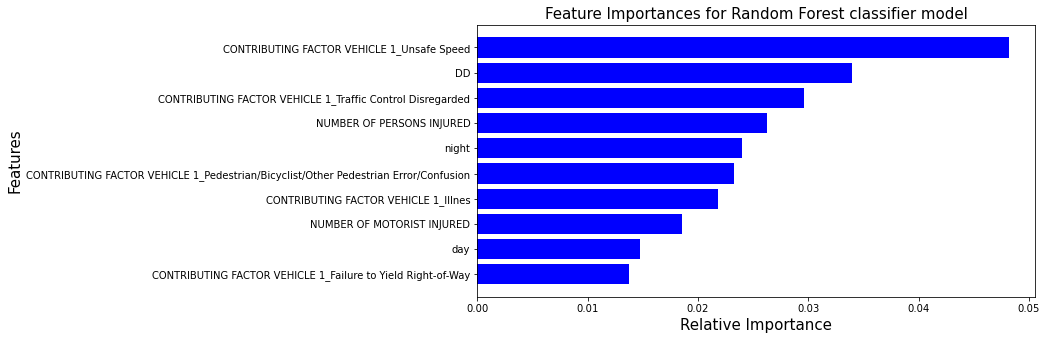

In [44]:
#Feature importances:

features = X
importances = list(rf.feature_importances_)
tab=pd.DataFrame(list(zip(X,importances)),columns =['Features', 'Importance scores']) 
print(tab[:10])
sorted_features =tab.sort_values(by=['Importance scores'], ascending=False)
#Visual comparison:
plt.figure(figsize=(10,5))
index = list(range(len(sorted_features[:10])))
_=plt.barh(index,sorted_features['Importance scores'][:10], align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, sorted_features['Features'][:10])
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.gca().invert_yaxis()
plt.savefig("28.png")
plt.show()
#len(importances)


Conclusion and Further Progress

                                              Features  Importance scores
78          CONTRIBUTING FACTOR VEHICLE 1_Unsafe Speed           0.114315
11                                             evening           0.094961
75   CONTRIBUTING FACTOR VEHICLE 1_Traffic Control ...           0.064399
12                                               night           0.055749
63   CONTRIBUTING FACTOR VEHICLE 1_Pedestrian/Bicyc...           0.049193
47                CONTRIBUTING FACTOR VEHICLE 1_Illnes           0.042366
473                                             Time_4           0.034433
41   CONTRIBUTING FACTOR VEHICLE 1_Failure to Yield...           0.030081
58   CONTRIBUTING FACTOR VEHICLE 1_Passenger Distra...           0.028149
9                                              morning           0.025850


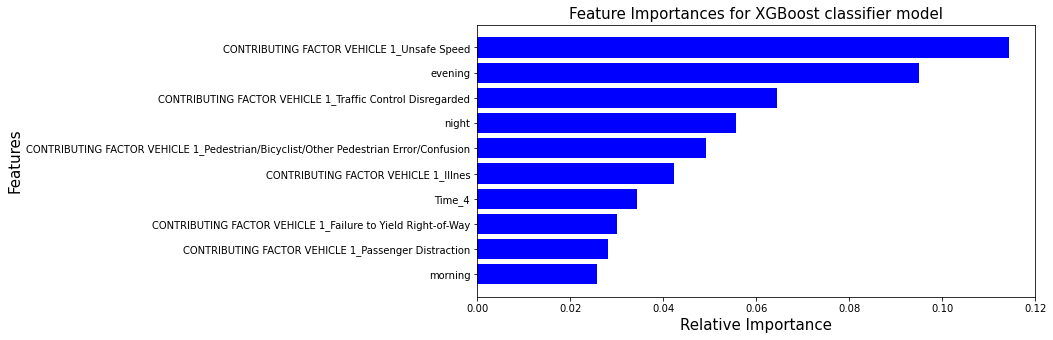

In [45]:
features = X
importances = list(xgb.feature_importances_)
tab=pd.DataFrame(list(zip(X,importances)),columns =['Features', 'Importance scores']) 

sorted_features =tab.sort_values(by=['Importance scores'], ascending=False)
print(sorted_features[:10])
#Visual comparison:
plt.figure(figsize=(10,5))
index = list(range(len(sorted_features[:10])))
_=plt.barh(index,sorted_features['Importance scores'][:10], align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, sorted_features['Features'][:10])
plt.title('Feature Importances for XGBoost classifier model',fontsize=15)
plt.gca().invert_yaxis()
plt.savefig("29.png")
plt.show()
#len(importances)


                                             Features  Importance scores  \
47               CONTRIBUTING FACTOR VEHICLE 1_Illnes           3.113428   
63  CONTRIBUTING FACTOR VEHICLE 1_Pedestrian/Bicyc...           2.410042   
42      CONTRIBUTING FACTOR VEHICLE 1_Fatigued/Drowsy          -2.215204   
59  CONTRIBUTING FACTOR VEHICLE 1_Passing Too Closely          -2.214365   
78         CONTRIBUTING FACTOR VEHICLE 1_Unsafe Speed           2.102210   
..                                                ...                ...   
68  CONTRIBUTING FACTOR VEHICLE 1_Shoulders Defect...           0.000000   
54  CONTRIBUTING FACTOR VEHICLE 1_Other Lighting D...           0.000000   
50  CONTRIBUTING FACTOR VEHICLE 1_Listening/Using ...           0.000000   
46  CONTRIBUTING FACTOR VEHICLE 1_Headlights Defec...           0.000000   
83  CONTRIBUTING FACTOR VEHICLE 1_Windshield Inade...           0.000000   

    Absolute_val  
47      3.113428  
63      2.410042  
42      2.215204  
59      2.2

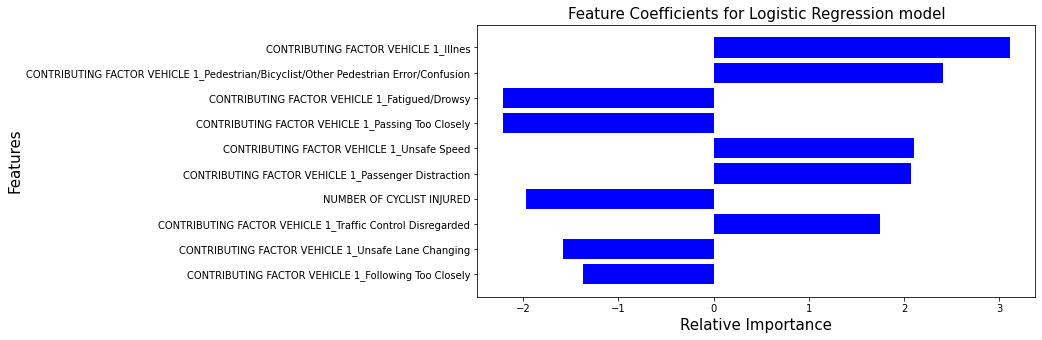

In [48]:
features = X
importances = logreg.coef_
absolute_importances = abs(logreg.coef_)
tab=pd.DataFrame(list(zip(X,importances[0], absolute_importances[0])),columns =['Features', 'Importance scores','Absolute_val']) 

sorted_features =tab.sort_values(by=['Absolute_val'], ascending=False)
print(sorted_features)
#Visual comparison:
plt.figure(figsize=(10,5))
index = list(range(len(sorted_features[:10])))
_=plt.barh(index,sorted_features['Importance scores'][:10], align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, sorted_features['Features'][:10])
plt.title('Feature Coefficients for Logistic Regression model',fontsize=15)
plt.gca().invert_yaxis()
plt.savefig("29.png")
plt.show()
#len(importances)

Random Forest roc score 

In [49]:
#plot roc curves

from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.7498944297564105


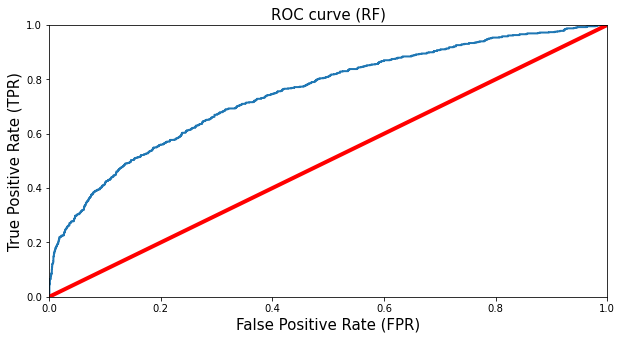

In [50]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("30.png")
plt.show()

In [51]:

y_scores_xgb = xgb.predict_proba(X_test)
y_scores_xgb = y_scores_xgb[:,1]
auroc = roc_auc_score(y_test, y_scores_xgb)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.7759724541385469


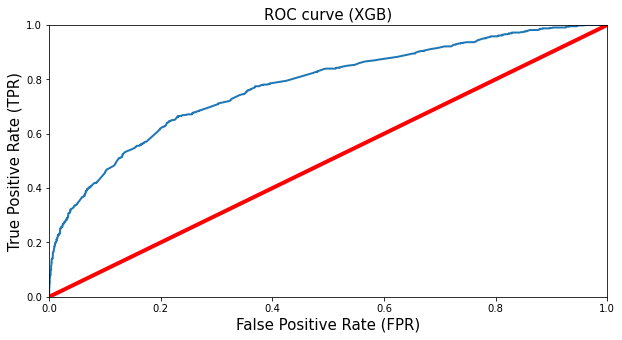

In [52]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_xgb)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (XGB)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("30.png")
plt.show()

In [53]:
y_scores_logreg = logreg.predict_proba(X_test)
y_scores_logreg = y_scores_logreg[:,1]
auroc = roc_auc_score(y_test, y_scores_logreg)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.7495455889515062


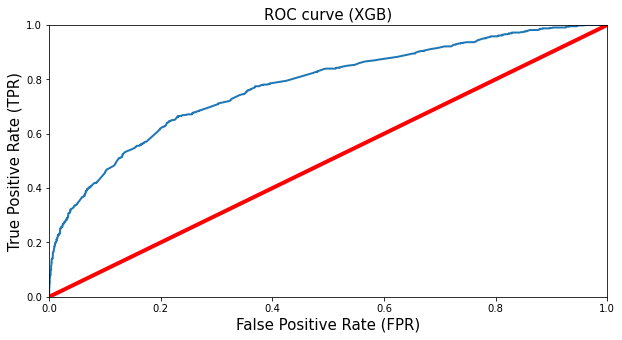

In [54]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_xgb)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (XGB)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("30.png")
plt.show()

In [55]:
def measurements(model, y_true, y_pred):
    print(str(model) +" precision is: " + str(precision_score(y_true, y_pred)))
    print(str(model) + " recall is: " + str(recall_score(y_true, y_pred)))
    print(str(model)+ " f1-score is: " + str(f1_score(y_true, y_pred)))
    
measurements('Random Forest', y_test, y_predictions_rf)
measurements('XGboost', y_test ,y_predictions_xgb)
measurements('Logistic Regression',  y_test ,y_predictions_log)

Random Forest precision is: 0.7687074829931972
Random Forest recall is: 0.1743827160493827
Random Forest f1-score is: 0.2842767295597484
XGboost precision is: 0.7424242424242424
XGboost recall is: 0.22685185185185186
XGboost f1-score is: 0.3475177304964539
Logistic Regression precision is: 0.6597510373443983
Logistic Regression recall is: 0.24537037037037038
Logistic Regression f1-score is: 0.35770528683914515


In [166]:
#conclusion